In [5]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import iv, kv

In [2]:
table=Table.read("norsiah_data.csv")
table

Radius,V_rot,e,w
float64,float64,float64,float64
0.643,31.74,7.3385,0.0186
0.965,44.56,7.0315,0.0202
1.287,53.48,3.5824,0.0779
1.608,57.07,2.5539,0.1533
1.93,61.31,4.1813,0.0572
2.251,64.91,1.7205,0.3378
2.573,68.47,4.191,0.0569
2.895,71.62,2.2004,0.2065
3.216,75.35,1.7779,0.3164


C:\Users\hassa\AppData\Local\Temp\ipykernel_13804\1539726101.py:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(table['Radius'],table['V_rot'],yerr=table['e'],fmt='o', marker='o', ms=3 , mfc='black') # (x, y, yerror)


<function matplotlib.pyplot.show(close=None, block=None)>

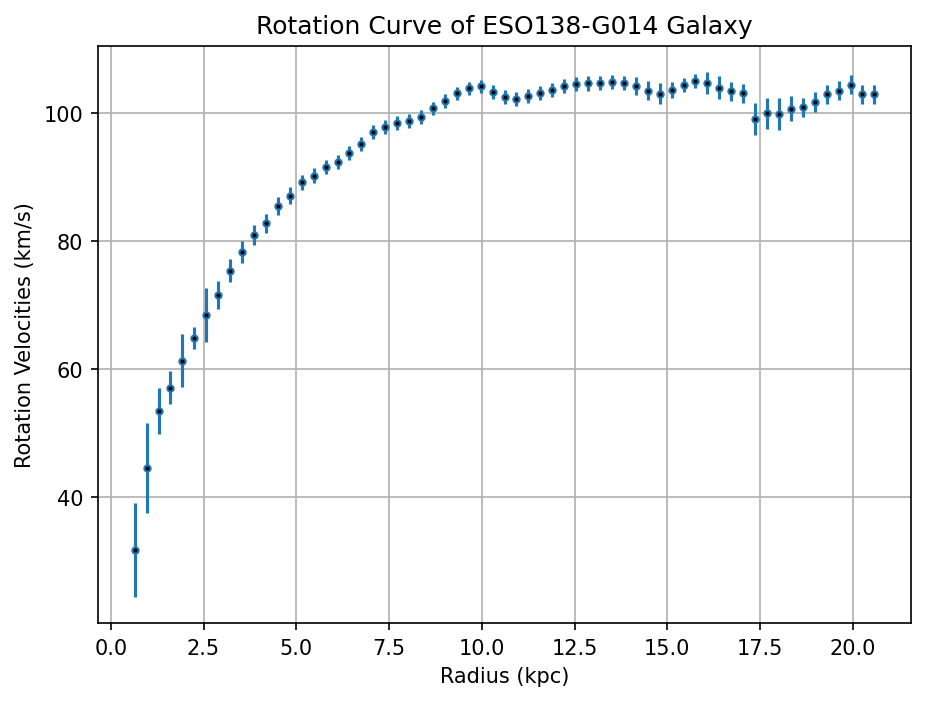

In [3]:
plt.figure(figsize=(7,5), dpi=150)
plt.errorbar(table['Radius'],table['V_rot'],yerr=table['e'],fmt='o', marker='o', ms=3 , mfc='black') # (x, y, yerror)
#plt.scatter(table['Radius'],table['V_rot'],s = 5, color = 'red') # (x, y, s=size)
plt.xlabel('Radius (kpc)')
plt.ylabel('Rotation Velocities (km/s)')
plt.title('Rotation Curve of ESO138-G014 Galaxy')
plt.grid(True)
plt.show

Non-linear fitting

In [ ]:
# define data set
y_data = table['V_rot']
x_data = table['Radius']
G = 4.302 * 10**-5



Define Model A

In [9]:
# define fitting equation for V_disk^2
def V_disk(r, M_D):
    return (0.5 * G * M_D / 2.7) * ((3.2 * (r / (3.2 * 2.7))) ** 2 ) * (iv(0, 1.6 * r / (3.2 * 2.7)) * kv(0, 1.6 * r / (3.2 * 2.7)) - iv(1, 1.6 * r / (3.2 * 2.7)) * kv(1, 1.6 * r / (3.2 * 2.7)))

Defining Model B

In [8]:
# define fitting equation for NFW Profile
def NFW_profile(r, P_0, r_s):
    return 4 * np.pi * G * P_0 * (r_s ** 3) * ( np.log( 1 + r / r_s) - (r / r_s) / ((r / r_s) + 1))

<function matplotlib.pyplot.show(close=None, block=None)>

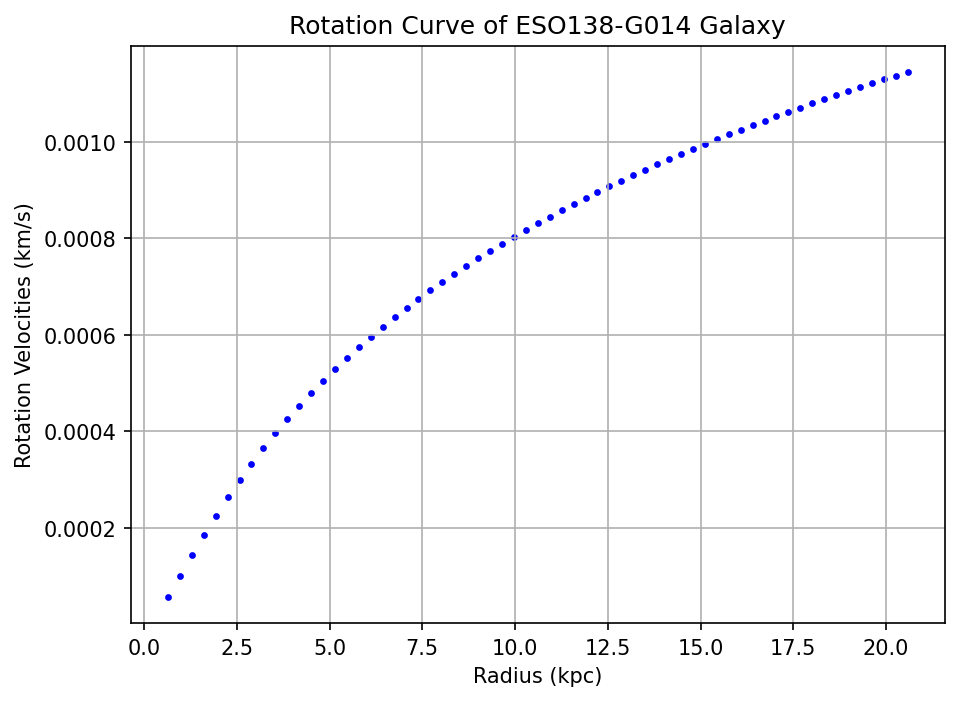

In [16]:
x_1 = table['Radius']
y_1 = V_disk(x_1, 1)
y_2 = NFW_profile(x_1, 1, 1)

plt.figure(figsize=(7,5), dpi=150)
#plt.errorbar(table['Radius'],table['V_rot'],yerr=table['e'],fmt='o', marker='o', ms=3 , mfc='black') # (x, y, yerror)
#plt.scatter(x_1,y_1,s = 5, color = 'red') # (x, y, s=size)`
plt.scatter(x_1,y_2,s = 5, color = 'blue') # (x, y, s=size)`
plt.xlabel('Radius (kpc)')
plt.ylabel('Rotation Velocities (km/s)')
plt.title('Rotation Curve of ESO138-G014 Galaxy')
plt.grid(True)
plt.show